<h1>Classification</h1><br>
Classification in supervised machine learning is like teaching a computer to recognize and sort things<br>
Types:<br>
1. Binary<br>
2. Multi-class<br>
3. Multi-label<br>

Sigmoid Function<br>
$g(X) = \frac{1}{1 + e^{-x}}$<br>
Logistic Regression Equation:<br>
H = $g(Z) = \frac{1}{1 + e^{-z}}$<br>

<h2>Decision Boundary</h2><br>
In logistic regression, the decision boundary is the surface (or line, in two dimensions) that separates different classes in a classification problem. It is derived from the logistic regression model and represents the threshold at which the predicted probability changes from one class to another.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<h2>Create a Small DataSet</h2>
Let's assume we have a dataset where:<br>
Feature(X) represents the number of study hours.<br>
Target(y) represents whether a student passed(1) or failed(0)<br>

In [12]:
#Example dataset: Study Hours vs Pass/Fail(Binary Classification)
X=np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])#Study Hours
y = np.array([0,0,0,0,1,1,1,1,1,1])#0=fail,1=pass

In [13]:
#Split Data into Traning And Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
#Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [15]:
#Make Predictions
y_pred = model.predict(X_test)
print("Prediction:",y_pred)

Prediction: [1 0]


In [16]:
#Evaluate Model
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


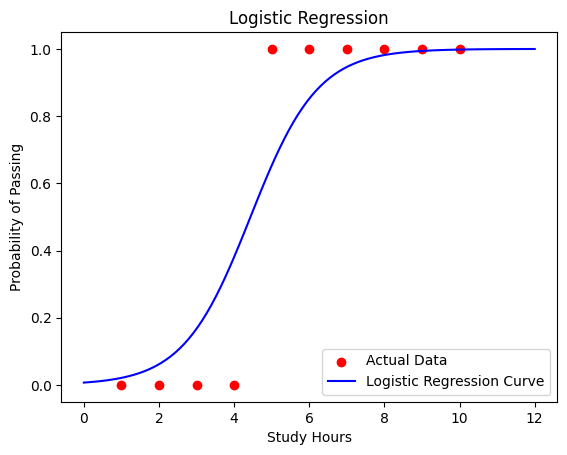

In [18]:
#Visualize the Logistic Regression Curve
#Generate values for plotting
X_range = np.linspace(0,12,100).reshape(-1,1)
y_prob = model.predict_proba(X_range)[:,1]

#plot
plt.scatter(X,y, color = "red", label ="Actual Data")
plt.plot(X_range,y_prob,color="Blue",label="Logistic Regression Curve")
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression")
plt.legend()
plt.show()

<h1>Heart Disease Dataset</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,auc

In [2]:
df = pd.read_csv("C:/AI-DS/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  

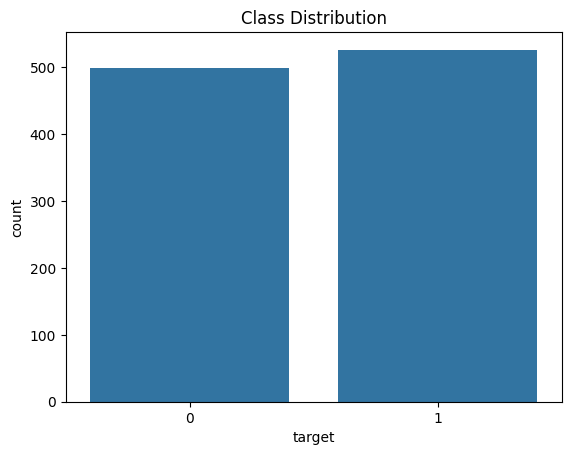

In [3]:
#EDA(Exploratory Data Analysis)
#Check for missing values
print(df.isnull().sum())

#Summary Statistics
print(df.describe())

#Check class distribution
sns.countplot(x=df['target'])
plt.title("Class Distribution")
plt.show()

<h2>Feature Selection and Preprocessing</h2>

In [4]:
#Define independent variables (X) and target variable (y)
X = df.drop("target",axis=1)
y=df["target"]

#Split the dataset info training and testing sets(80-20 splits)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Standardize the featuers
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h1>Train Logistic Regression Model</h1>

In [5]:
model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(y_pred)

[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0]


In [9]:

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80



Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



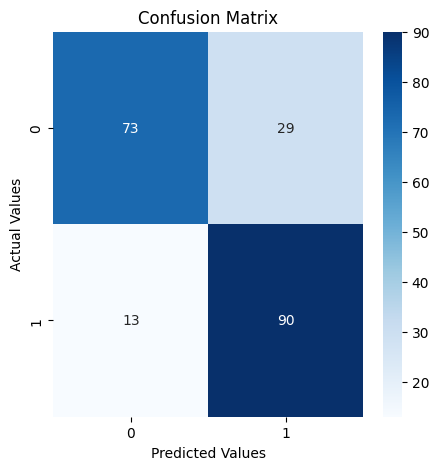

In [10]:
#Classification Report
print("\nClassification Report:\n",classification_report(y_test,y_pred))

#Confusion Matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

Entropy formula :<br>
$$
Entropy = - P \log_2 P - Q \log_2 Q
$$
$$
Entropy = -\sum_{i=1}^{c} P_i \log_2 P_i
$$
Where i = possible values for the attribute<br>
Gini Impurity(Another Measure for classification):<br>
$$
Gini = 1 - \sum P_i^2
$$



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [12]:
df  = pd.read_csv("C:/AI-DS/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


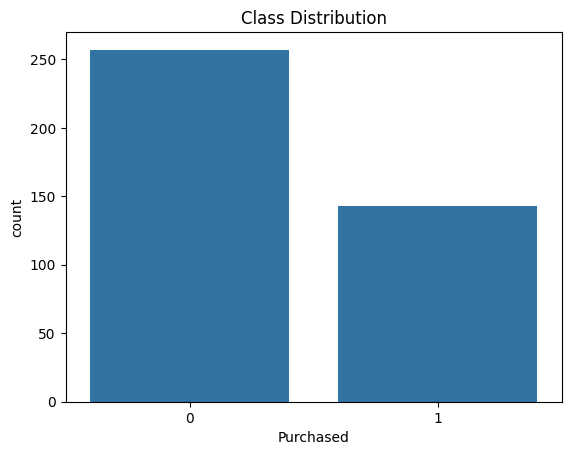

In [14]:
#EDA(Exploratory Data Analysis)
#Check for missing values
print(df.isnull().sum())

#Summary Statistics
print(df.describe())

#Check class distribution
sns.countplot(x=df['Purchased'])
plt.title("Class Distribution")
plt.show()

In [15]:
df['Gender']=df['Gender'].map({'Male':0,'female':1})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0.0,19,19000,0
1,15810944,0.0,35,20000,0
2,15668575,NaN,26,43000,0
3,15603246,NaN,27,57000,0
4,15804002,0.0,19,76000,0


In [ ]:
# #Define independent variables (X) and target variable (y)
# X = df.drop("Purchased",axis=1)
# y=df["Purchased"]

# #Split the dataset info training and testing sets(80-20 splits)
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# # Standardize the featuers
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [18]:
X=df.iloc[:,2:4].values#Intependent Variables
y=df.iloc[:,-1].values#Dependent Variable(Target variable)

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
y_pred=classifier.predict(X_test)

<Axes: >

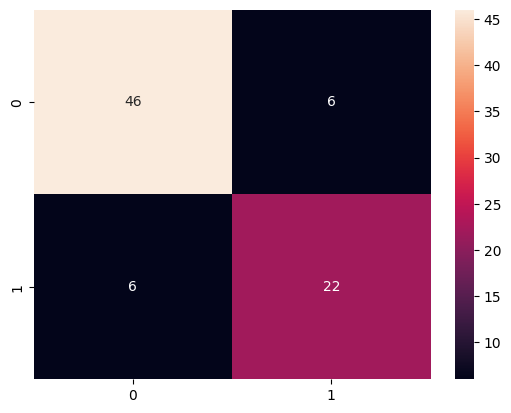

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.85